In [523]:
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
from tqdm import tqdm_notebook
# from folium.plugins import MarkerCluster
# import geoplot as gplt
# import geopandas as gpd
# import geoplot.crs as gcrs
# import imageio
# import mapclassify as mc
# import statsmodels.api as sm
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.arima_model import ARIMA
import scipy
from itertools import product
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']


In [524]:
import os

import pandas as pd
from datetime import datetime
import numpy as np


In [526]:

import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from datetime import datetime
import numpy as np



In [527]:
data = pd.read_csv(r'C:\Users\Yassine\Desktop\SolarPrediction V3.csv')
#data['Data'] = data['Data'].astype(str)


In [528]:
print (data)

           UNIXTime                     Data      Time  Radiation  \
0      1.475229e+09         8/31/16 12:00 AM  23:55:26       1.21   
1      1.475229e+09         9/29/16 12:00 AM  23:50:23       1.21   
2      1.475229e+09         9/29/16 12:00 AM  23:45:26       1.23   
3      1.475228e+09         9/29/16 12:00 AM  23:40:21       1.21   
4      1.475228e+09         9/29/16 12:00 AM  23:35:24       1.17   
...             ...                      ...       ...        ...   
32682  1.480587e+09      2016-01-12 00:00:00  00:15:01       1.17   
32683  1.480587e+09      2016-01-12 00:00:00  00:10:01       1.20   
32684  1.480587e+09      2016-01-12 00:00:00  00:05:02       1.23   
32685  1.480586e+09      2016-01-12 00:00:00  00:00:02       1.20   
32686           NaN  31/11/2016  12:00:00 AM       NaN        NaN   

       Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0             48.0     30.46      59.0                  177.39   5.62   
1             48.0     30

In [529]:
data.shape

(32687, 15)

In [530]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,SUN DURATION,DAYS,Sun duration in min,Time measurment
0,1.475229e+09,8/31/16 12:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00,12:00:00,NaN,NaN,1435.0
1,1.475229e+09,9/29/16 12:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00,12:00:00,29.0,720.0,1430.0
2,1.475229e+09,9/29/16 12:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00,12:00:00,29.0,720.0,1425.0
3,1.475228e+09,9/29/16 12:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00,12:00:00,29.0,720.0,1420.0
4,1.475228e+09,9/29/16 12:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00,12:00:00,29.0,720.0,1415.0


In [531]:
data = pd.DataFrame(data)
  
# Remove column name 'UNIXTime'
data.drop(['UNIXTime','WindDirection(Degrees)', 'TimeSunRise','TimeSunSet'], axis = 1)


,Data,Time,Radiation,Temperature,Pressure,Humidity,Speed,SUN DURATION,DAYS,Sun duration in min,Time measurment
0,8/31/16 12:00 AM,23:55:26,1.21,48.0,30.46,59.0,5.62,12:00:00,NaN,NaN,1435.0
1,9/29/16 12:00 AM,23:50:23,1.21,48.0,30.46,58.0,3.37,12:00:00,29.0,720.0,1430.0
2,9/29/16 12:00 AM,23:45:26,1.23,48.0,30.46,57.0,3.37,12:00:00,29.0,720.0,1425.0
3,9/29/16 12:00 AM,23:40:21,1.21,48.0,30.46,60.0,3.37,12:00:00,29.0,720.0,1420.0
4,9/29/16 12:00 AM,23:35:24,1.17,48.0,30.46,62.0,5.62,12:00:00,29.0,720.0,1415.0
...,...,...,...,...,...,...,...,...,...,...,...
32682,2016-01-12 00:00:00,00:15:01,1.17,44.0,30.42,102.0,6.75,11:01:00,92.0,661.0,15.0
32683,2016-01-12 00:00:00,00:10:01,1.20,44.0,30.42,102.0,9.00,11:01:00,92.0,661.0,10.0
32684,2016-01-12 00:00:00,00:05:02,1.23,44.0,30.42,101.0,7.87,11:01:00,92.0,661.0,5.0
32685,2016-01-12 00:00:00,00:00:02,1.20,44.0,30.43,101.0,3.37,11:01:00,92.0,661.0,0.0


In [532]:
data['Radiation'].index

RangeIndex(start=0, stop=32687, step=1)

In [533]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32687 entries, 0 to 32686
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  float64
 1   Data                    32687 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  float64
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  float64
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
 11  SUN DURATION            32686 non-null  object 
 12  DAYS                    32685 non-null  float64
 13  Sun duration in min     32685 non-null  float64
 14  Time measurment         32686 non-null

In [534]:
data.replace(np.nan, 0)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,SUN DURATION,DAYS,Sun duration in min,Time measurment
0,1.475229e+09,8/31/16 12:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00,12:00:00,0.0,0.0,1435.0
1,1.475229e+09,9/29/16 12:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00,12:00:00,29.0,720.0,1430.0
2,1.475229e+09,9/29/16 12:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00,12:00:00,29.0,720.0,1425.0
3,1.475228e+09,9/29/16 12:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00,12:00:00,29.0,720.0,1420.0
4,1.475228e+09,9/29/16 12:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00,12:00:00,29.0,720.0,1415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32682,1.480587e+09,2016-01-12 00:00:00,00:15:01,1.17,44.0,30.42,102.0,117.78,6.75,06:41:00,17:42:00,11:01:00,92.0,661.0,15.0
32683,1.480587e+09,2016-01-12 00:00:00,00:10:01,1.20,44.0,30.42,102.0,145.19,9.00,06:41:00,17:42:00,11:01:00,92.0,661.0,10.0
32684,1.480587e+09,2016-01-12 00:00:00,00:05:02,1.23,44.0,30.42,101.0,164.19,7.87,06:41:00,17:42:00,11:01:00,92.0,661.0,5.0
32685,1.480586e+09,2016-01-12 00:00:00,00:00:02,1.20,44.0,30.43,101.0,83.59,3.37,06:41:00,17:42:00,11:01:00,92.0,661.0,0.0


result = np.where(df==0)

print(result)

In [535]:
data['DAYS'] = data['DAYS'].replace(np.nan, 29)
data['Sun duration in min'] = data['Sun duration in min'].replace(np.nan, 720)


In [536]:
data.dropna()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,SUN DURATION,DAYS,Sun duration in min,Time measurment
0,1.475229e+09,8/31/16 12:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00,12:00:00,29.0,720.0,1435.0
1,1.475229e+09,9/29/16 12:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00,12:00:00,29.0,720.0,1430.0
2,1.475229e+09,9/29/16 12:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00,12:00:00,29.0,720.0,1425.0
3,1.475228e+09,9/29/16 12:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00,12:00:00,29.0,720.0,1420.0
4,1.475228e+09,9/29/16 12:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00,12:00:00,29.0,720.0,1415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.480588e+09,2016-01-12 00:00:00,00:20:04,1.22,44.0,30.43,102.0,145.42,6.75,06:41:00,17:42:00,11:01:00,92.0,661.0,20.0
32682,1.480587e+09,2016-01-12 00:00:00,00:15:01,1.17,44.0,30.42,102.0,117.78,6.75,06:41:00,17:42:00,11:01:00,92.0,661.0,15.0
32683,1.480587e+09,2016-01-12 00:00:00,00:10:01,1.20,44.0,30.42,102.0,145.19,9.00,06:41:00,17:42:00,11:01:00,92.0,661.0,10.0
32684,1.480587e+09,2016-01-12 00:00:00,00:05:02,1.23,44.0,30.42,101.0,164.19,7.87,06:41:00,17:42:00,11:01:00,92.0,661.0,5.0


In [537]:
data.dropna( inplace = True )
data. isnull(). sum()


UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
SUN DURATION              0
DAYS                      0
Sun duration in min       0
Time measurment           0
dtype: int64

In [538]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32686 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  float64
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  float64
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  float64
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
 11  SUN DURATION            32686 non-null  object 
 12  DAYS                    32686 non-null  float64
 13  Sun duration in min     32686 non-null  float64
 14  Time measurment         32686 non-null

In [539]:
print (data)

           UNIXTime                 Data      Time  Radiation  Temperature  \
0      1.475229e+09     8/31/16 12:00 AM  23:55:26       1.21         48.0   
1      1.475229e+09     9/29/16 12:00 AM  23:50:23       1.21         48.0   
2      1.475229e+09     9/29/16 12:00 AM  23:45:26       1.23         48.0   
3      1.475228e+09     9/29/16 12:00 AM  23:40:21       1.21         48.0   
4      1.475228e+09     9/29/16 12:00 AM  23:35:24       1.17         48.0   
...             ...                  ...       ...        ...          ...   
32681  1.480588e+09  2016-01-12 00:00:00  00:20:04       1.22         44.0   
32682  1.480587e+09  2016-01-12 00:00:00  00:15:01       1.17         44.0   
32683  1.480587e+09  2016-01-12 00:00:00  00:10:01       1.20         44.0   
32684  1.480587e+09  2016-01-12 00:00:00  00:05:02       1.23         44.0   
32685  1.480586e+09  2016-01-12 00:00:00  00:00:02       1.20         44.0   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSu

In [540]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DAYS,Sun duration in min,Time measurment
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.00000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,62.110965,690.550542,721.13232
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,34.781367,29.931225,415.01100
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,1.000000,656.000000,0.00000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,33.000000,662.000000,360.00000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,62.000000,684.000000,720.50000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,90.000000,715.000000,1081.00000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,122.000000,751.000000,1436.00000


In [541]:
data['Radiation'].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            32676, 32677, 32678, 32679, 32680, 32681, 32682, 32683, 32684,
            32685],
           dtype='int64', length=32686)

In [542]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32686 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  float64
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  float64
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  float64
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
 11  SUN DURATION            32686 non-null  object 
 12  DAYS                    32686 non-null  float64
 13  Sun duration in min     32686 non-null  float64
 14  Time measurment         32686 non-null

In [543]:
data.corr()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DAYS,Sun duration in min,Time measurment
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860,0.999966,-0.978599,0.001465
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.081320,0.073456,0.004305
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.370794,0.355509,0.197119
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.332762,0.278614,0.090959
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.063760,0.087356,0.077862
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.153255,-0.129434,-0.077884
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.174336,-0.174944,-0.057888
DAYS,0.999966,-0.081320,-0.370794,-0.332762,-0.063760,0.153255,0.174336,1.000000,-0.978641,-0.006821
Sun duration in min,-0.978599,0.073456,0.355509,0.278614,0.087356,-0.129434,-0.174944,-0.978641,1.000000,0.007652
Time measurment,0.001465,0.004305,0.197119,0.090959,0.077862,-0.077884,-0.057888,-0.006821,0.007652,1.000000


C:\Users\Yassine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity', ylabel='Radiation'>

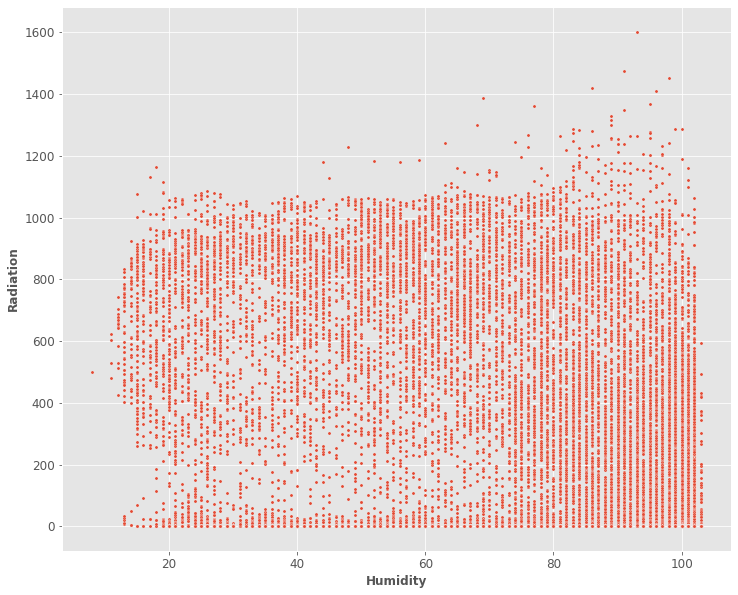

In [544]:
sns.scatterplot(data['Humidity'],data['Radiation'],s=10)


(0.0, 1703.279999016873)

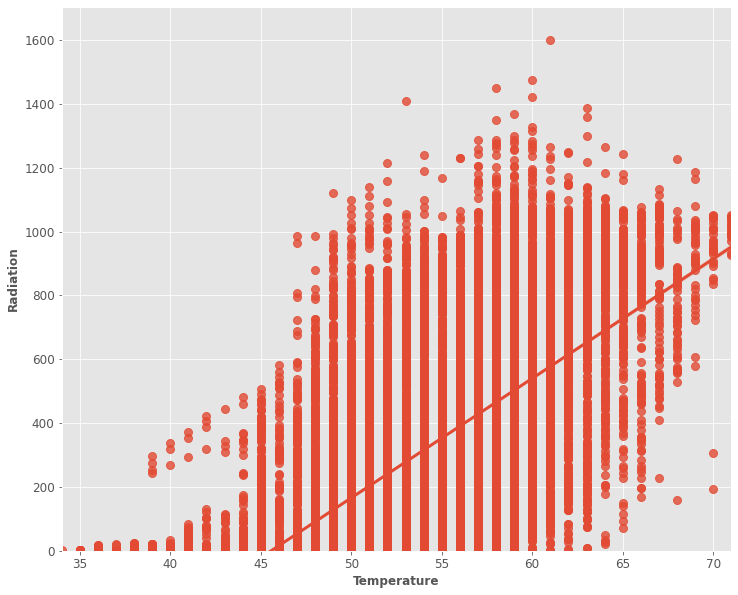

In [545]:
sns.regplot(x="Temperature", y="Radiation", data=data)
plt.ylim(0,)

C:\Users\Yassine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure', ylabel='Radiation'>

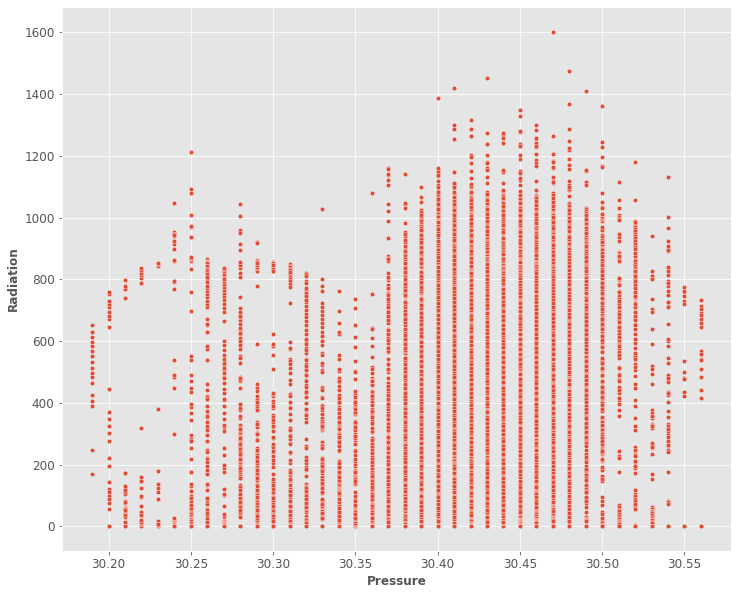

In [546]:
sns.scatterplot(data['Pressure'],data['Radiation'],s=20)

C:\Users\Yassine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speed', ylabel='Radiation'>

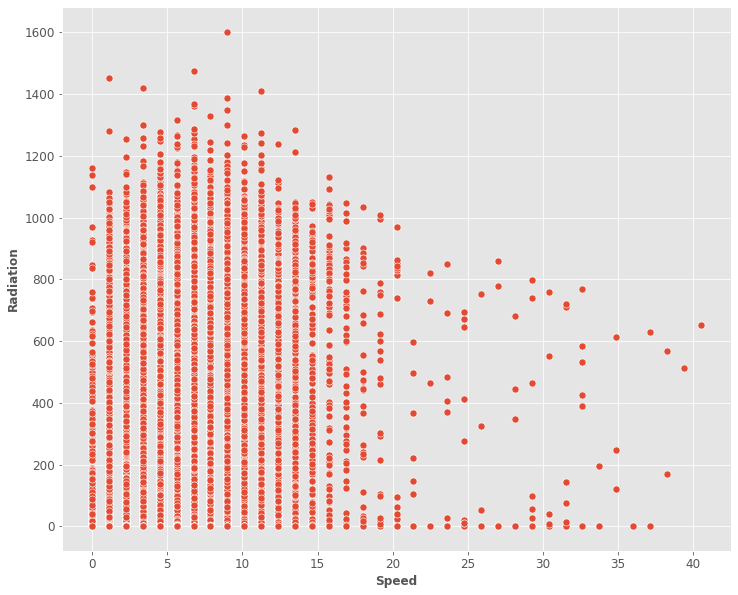

In [547]:
sns.scatterplot(data['Speed'],data['Radiation'],s=50)

<AxesSubplot:>

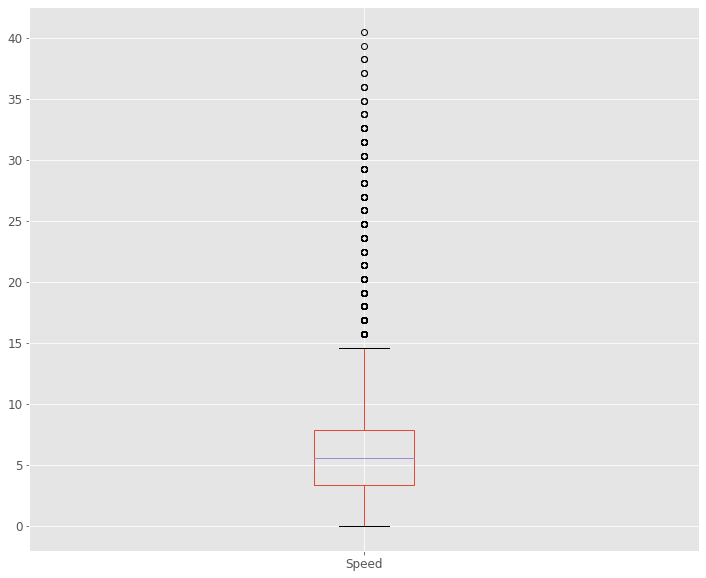

In [548]:
data.boxplot("Speed")

C:\Users\Yassine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAYS', ylabel='Radiation'>

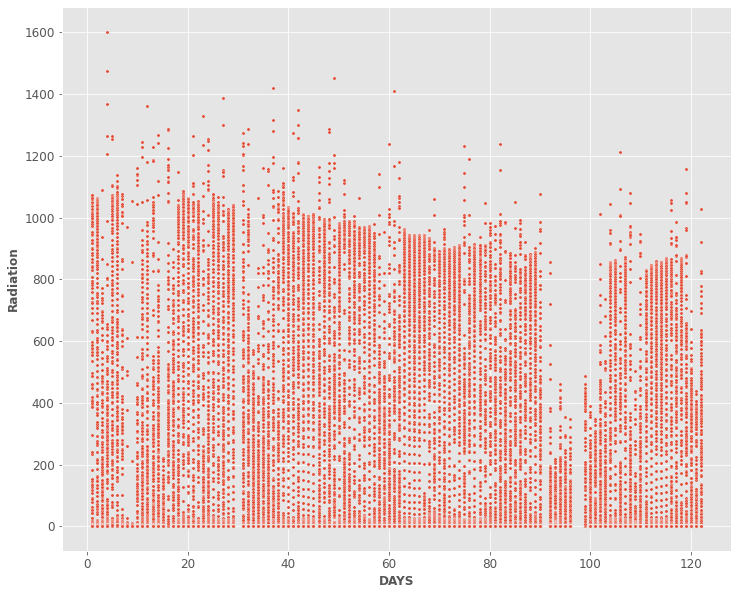

In [549]:
sns.scatterplot(data['DAYS'],data['Radiation'],s=10)

In [550]:
x=data['Radiation'].sum()
y=len(data['Radiation'])
AVG_Radiation = x/y
print(f"Radiation has an average of = {AVG_Radiation} ")

Radiation has an average of = 207.12469742397357 


C:\Users\Yassine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sun duration in min', ylabel='Temperature'>

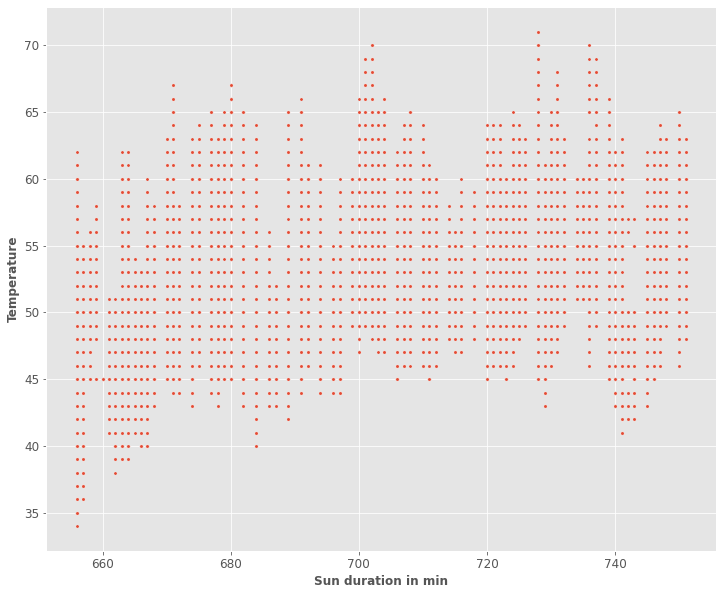

In [551]:
sns.scatterplot(data['Sun duration in min'],data['Temperature'],s=10)

C:\Users\Yassine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure', ylabel='Temperature'>

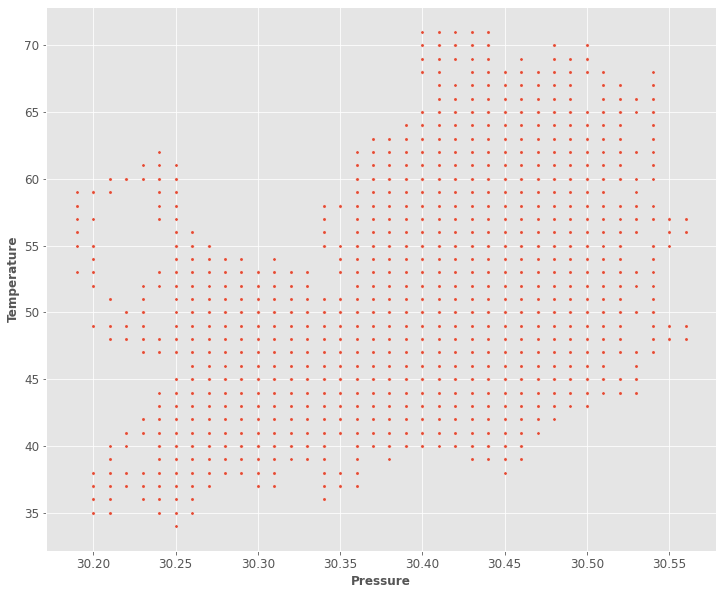

In [552]:
sns.scatterplot(data['Pressure'],data['Temperature'],s=10)

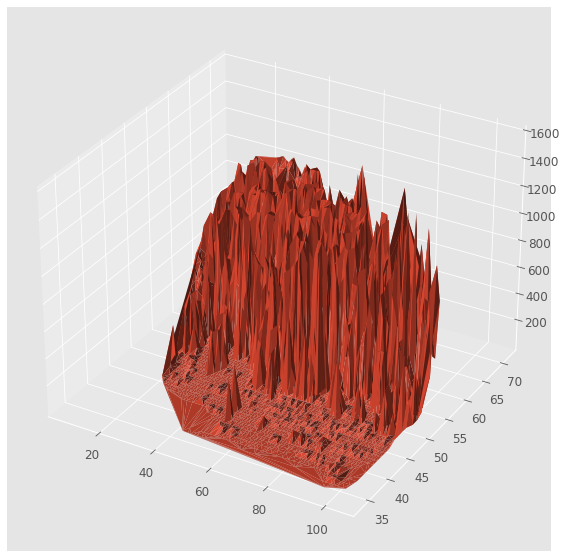

In [553]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z  = data['Humidity'],data['Temperature'],data['Radiation']
ax.plot_trisurf(X, Y, Z)

plt.show()

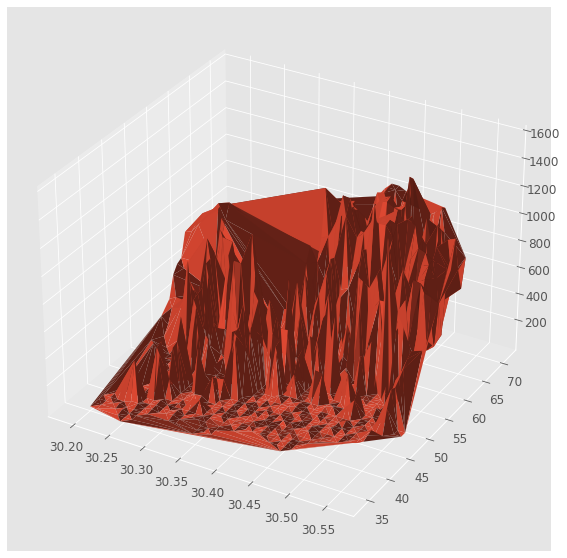

In [554]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z  = data['Pressure'],data['Temperature'],data['Radiation']
ax.plot_trisurf(X, Y, Z)
plt.show()

Decision Tree

In [555]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [556]:
feature_cols = ['Humidity', 'Temperature', 'Sun duration in min','DAYS','Time measurment','Speed']
X = data[feature_cols] # Features
y = data.Radiation # Target variable
y=y.astype(int)

In [557]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [558]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [559]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5208014683389416


NAIVE BASE

In [560]:
data.drop(['Data', 'Time' ,'UNIXTime','WindDirection(Degrees)', 'TimeSunRise','TimeSunSet', 'SUN DURATION'], axis = 1)

,Radiation,Temperature,Pressure,Humidity,Speed,DAYS,Sun duration in min,Time measurment
0,1.21,48.0,30.46,59.0,5.62,29.0,720.0,1435.0
1,1.21,48.0,30.46,58.0,3.37,29.0,720.0,1430.0
2,1.23,48.0,30.46,57.0,3.37,29.0,720.0,1425.0
3,1.21,48.0,30.46,60.0,3.37,29.0,720.0,1420.0
4,1.17,48.0,30.46,62.0,5.62,29.0,720.0,1415.0
...,...,...,...,...,...,...,...,...
32681,1.22,44.0,30.43,102.0,6.75,92.0,661.0,20.0
32682,1.17,44.0,30.42,102.0,6.75,92.0,661.0,15.0
32683,1.20,44.0,30.42,102.0,9.00,92.0,661.0,10.0
32684,1.23,44.0,30.42,101.0,7.87,92.0,661.0,5.0


In [561]:
X = data.iloc[:, [3, 4, 5,6,8,12,13,14]].values
y = data.iloc[:, -1].values
y=y.astype(int)

In [562]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [563]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [564]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred  

array([ 495,  495,  665, ...,  350, 1025, 1160])

In [565]:
y_test

array([ 495,  495,  665, ...,  350, 1025, 1160])

In [566]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
cm
print(f"the accuracy is equal to = {accuracy}")

the accuracy is equal to = 0.9940348730498624


We can see that the accuracy for the Naive Base is much higher for the Solar radiation

In [568]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [569]:
Z = data[['Humidity', 'Temperature', 'Pressure', 'Speed','Sun duration in min','DAYS','Time measurment']]
x=data[["Radiation"]]

In [570]:
from sklearn.model_selection import train_test_split


train_Z, test_Z= train_test_split(Z,train_size=0.85,test_size=0.15, random_state=2220)
train_x, test_x= train_test_split(x,train_size=0.85,test_size=0.15, random_state=2220)


In [571]:
lm.fit(test_Z, test_x)

LinearRegression()

In [572]:
lm.intercept_
lm.coef_
lm.score(test_Z, test_x)


0.6236612710196506

In [573]:
lm.predict(test_Z)

array([[346.38782238],
       [ 44.04050166],
       [ 19.84336027],
       ...,
       [ 95.21326154],
       [137.38906393],
       [187.70647593]])

In [574]:
print('The R-square is: ', lm.score(test_Z, test_x))

The R-square is:  0.6236612710196506


In [575]:
from sklearn.metrics import mean_squared_error
Predict=lm.predict(test_Z)
print('The mean square error of The Solar Radiation and predicted value using multifit is: ', \
      mean_squared_error(test_x,Predict))

The mean square error of The Solar Radiation and predicted value using multifit is:  38256.791253197094
